# Author: Hina Goto; Contact: Hina0830g@gmail.com

<h2> Table of Content </h2>

* [I. Dataset](#first-bullet) 
* [II. Create a new dataframe](#second-bullet)
* [III. 4-Panel Plot](#third-bullet)
* [IV. Summary](#fourth-bullet)

## I. Dataset <a class="anchor" id="first-bullet"></a>

In [21]:
# Import packages
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats as st

In [22]:
# Read an audio stats data set from Kaggle
result = pd.read_csv('songs_normalize.csv')

# Display the dataset
result

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


<h2 align=> II. Create a new dataframe </h2> <a class="anchor" id="second-bullet"></a>

In [23]:
# Convert the 'duration_ms' column from milliseconds to minutes
result['duration_min'] = result['duration_ms'] / 60000

note_dict = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}

# Convert the key in numbers to letters; key 0 = C Major, 1 = C# Major, etc and creates a new column
result['key_converted']= result['key'].map(note_dict)

# Split the genre column at commas and only keep the first genre per song
genre_first = result['genre'].str.split(',').str[0]
# Redefine the genre column
result['genre'] = genre_first

# Create a new genre, "Others" to group least frequent genres
result['genre'] = result['genre'].replace(['easy listening', 'set()', 'Folk/Acoustic'], 'Others')

In [24]:
# Create a new DataFrame only using relevant columns
result_new = pd.DataFrame({'artist': result['artist'], 'song': result['song'], 'duration [min]': result['duration_min'], 
                           'release year': result['year'], 'key': result['key_converted'], 'tempo [bpm]': result['tempo'],
                           'genre': result['genre']})

# Display the new dataframe; this will be the data I will be working with. 
result_new

# save dataframe to csv file
result_new.to_csv('Top_Hits_2000_2019.csv', index=False)#, overwrite=True)

<h2> 4-panel plot of the parameters (tempo, duration, key, & genre) </h2> <a class="anchor" id="third-bullet"></a>

Most common BMP 97.92
Most common BMP 125.20
Most common duration: 3.59


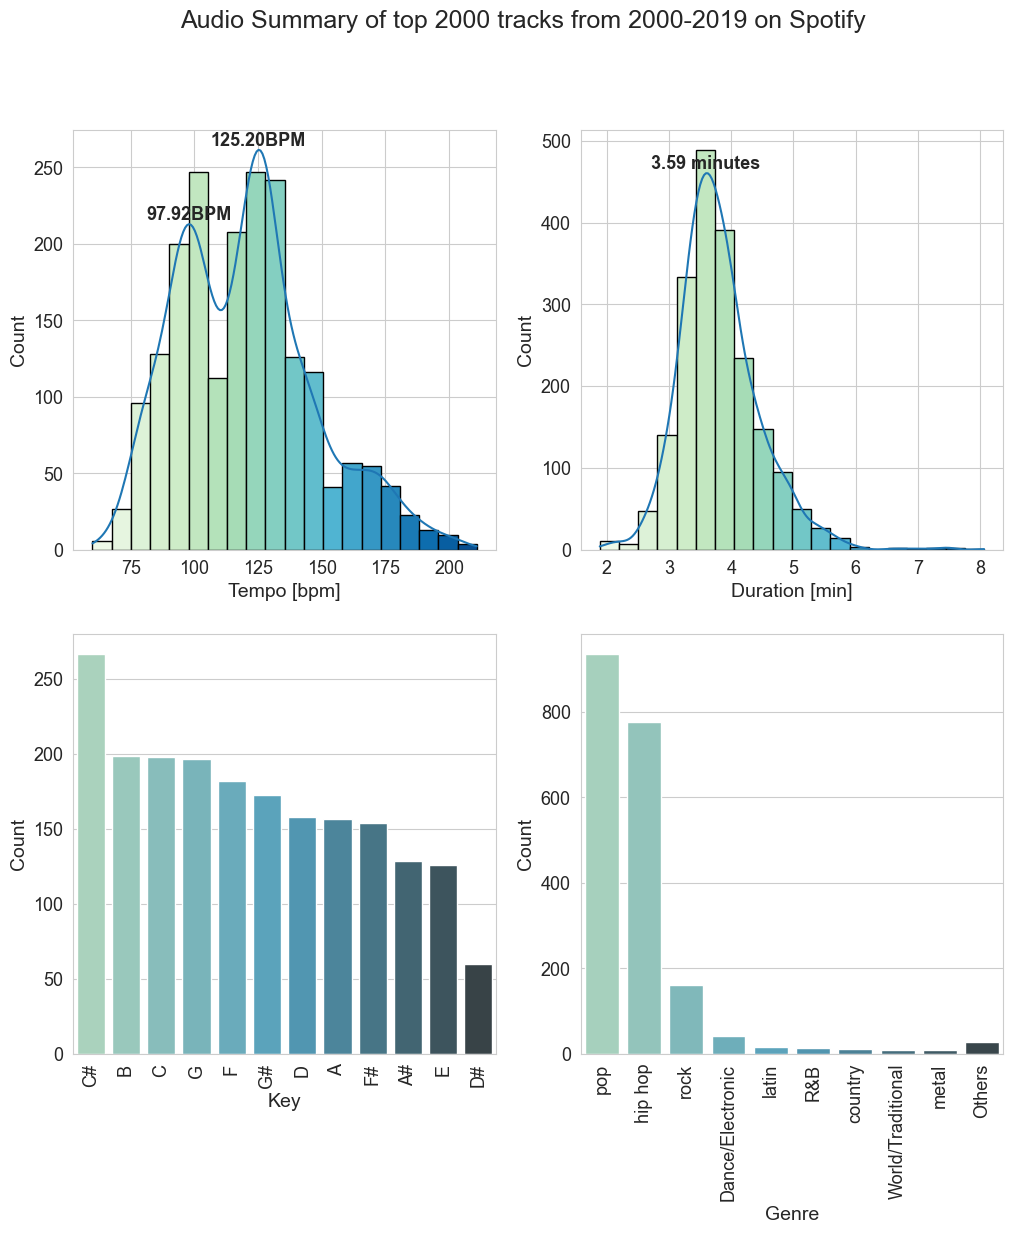

In [18]:
cm = sns.color_palette('GnBu', 20) #Splitting the palette in the same amount of numbers bins
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  
sns.set_style("whitegrid")
plt.suptitle('Audio Summary of top 2000 tracks from 2000-2019 on Spotify', fontsize=18)

# Plot histograms for quantitative parameters using seaborn
plot1 = sns.histplot(data=result_new, x="tempo [bpm]", kde=True, ax=axs[0, 0], bins=20, edgecolor="k")
plot1_kde_values = plot1.get_lines()[0].get_data()
peaks1 = scipy.signal.find_peaks(plot1_kde_values[1])[0] # Find the peaks in y

# Add the peak values as text annotations on the histogram
for i in peaks1:
    x1 = plot1_kde_values[0][i]
    y1 = plot1_kde_values[1][i]
    # Drop the local maxima
    if y1 > 100:
        axs[0, 0].text(x1, y1, f"{x1:.2f}" + "BPM", ha='center', va='bottom', fontsize=13, weight='bold')
        print("Most common BMP", f"{x1:.2f}" )
        

# Set the labels
plot1.set_xlabel("Tempo [bpm]",fontsize=14)
plot1.set_ylabel("Count",fontsize=14)
plot1.tick_params(axis='x', labelsize=13)
plot1.tick_params(axis='y', labelsize=13)

plot2 = sns.histplot(data=result_new, x="duration [min]", kde=True, ax=axs[0, 1], bins=20, edgecolor="k")
plot2_kde_values = plot2.get_lines()[0].get_data()
peaks2 = scipy.signal.find_peaks(plot2_kde_values[1])[0] # Find the peaks in y

# Add the peak values as text annotations on the histogram
for i in peaks2:
    x2 = plot2_kde_values[0][i]
    y2 = plot2_kde_values[1][i]
    # Drop the local maxima
    if y2 > 100:
        axs[0, 1].text(x2, y2, f"{x2:.2f}" + ' minutes', ha='center', va='bottom', fontsize=13, weight='bold')
        print("Most common duration:", f"{x2:.2f}" )

# Set tge labels
plot2.set_xlabel("Duration [min]",fontsize=14)
plot2.set_ylabel("Count",fontsize=14)
plot2.tick_params(axis='x', labelsize=13)
plot2.tick_params(axis='y', labelsize=13)

# Add the color gradient for each bin
for bin_,i in zip(plot1.patches,cm):
    bin_.set_facecolor(i)
    
for bin_,i in zip(plot2.patches,cm):
    bin_.set_facecolor(i)

# Converts the values of the dictionary to a list
genre_order = result_new['genre'].value_counts().index.tolist()

# Place "Others" at the very bottom
genre_order.remove('Others')
genre_order.append('Others')

key_order = result_new['key'].value_counts().index.tolist()

# Plot the countplot with the specified order
sns.countplot(data=result_new, x="key", ax=axs[1, 0], order=key_order, palette="GnBu_d")
axs[1, 0].set_xlabel('Key', fontsize=14)
axs[1, 0].set_ylabel('Count', fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=13)
axs[1, 0].tick_params(axis='y', labelsize=13)

sns.countplot(data=result_new, x="genre", order=genre_order, ax=axs[1, 1], palette="GnBu_d")
axs[1, 1].set_xlabel('Genre', fontsize=14)
axs[1, 1].set_ylabel('Count', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=13)
axs[1, 1].tick_params(axis='y', labelsize= 13)
    

plt.show()

## Summary <a class="anchor" id="fourth-bullet"></a>
Popuplar tempo during 2000-2019: **97.82 & 125.20 (BPM)**; This is bimodal distribution. <br>
Popuplar song duration during 2000-2019: **3.59 minutes (3 minutes and 35.4 seconds)** <br>
Popular keys during 2000-2019: **C# Major / E Minor, B Major / G# Minor** <br>
Popular genre during 2000-2019: **Pop, Hip Hop** <br>